<a href="https://colab.research.google.com/github/ealeongomez/Deep-Learning/blob/master/Neural_Network_From_Zero.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Red Neuronal**

Este esta enfocado para el diseño desde zero de una red neuronal 

In [ ]:
import numpy as np
import scipy as sc 
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles 

#**Crear un data set**

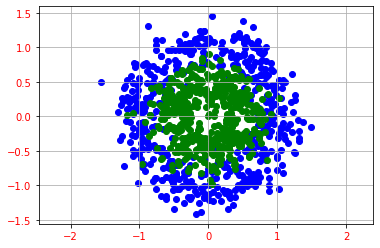

In [ ]:
n = 1000 # Número de datos a crear 
p = 2    # Número de caraterísticas de nuestros datos 

X, y = make_circles(n_samples=n, # Número de datos a crear 
                    factor=0.5,  # Distancia entre los circulos 
                    noise=0.2    # Añadir variabilidad entre los datos
                    )

y = y[:, np.newaxis]

# Plotear datos
plt.scatter(X[y[:,0]==0, 0], X[y[:,0]==0, 1], c='b')
plt.scatter(X[y[:,0]==1, 0], X[y[:,0]==1, 1], c='g')
plt.xticks(c='r')
plt.yticks(c='r')
plt.axis('equal')
plt.grid(True)
plt.show()

In [ ]:
X.shape

(1000, 2)

#**Clase de la capa de la Red**

In [ ]:
class neural_layer():

  # Inicializador de la clase donde solo tendra los parametros de las capas ()
  def __init__(self, n_conn, n_neur, act_f):
    '''
    Inicialización del método que inicializa los atributos del objeto creado
    Parametros
        n_conn: número de conexiones que entran a nuestra capa de la capa anterior 
        n_neur: número de neuronas de la capa
        act_f: función de activación que tenemos en nuestra capa 
    '''

    self.act_f = act_f
    self.b = np.random.rand(1, n_neur)*2 - 1       # Inicialización de los bias de las neuronas  
    self.w = np.random.rand(n_conn, n_neur)*2 - 1  # Inicialización de los pesos en la capa 


#**Funciones de activación**

1. Sigmoid

$sigm(x) = \frac{1}{1+exp(-x)}$

2. Derivada de la función sigmoid

$\frac{\partial C}{\partial x} = sigm(x) ( 1 - sigm(x) )$


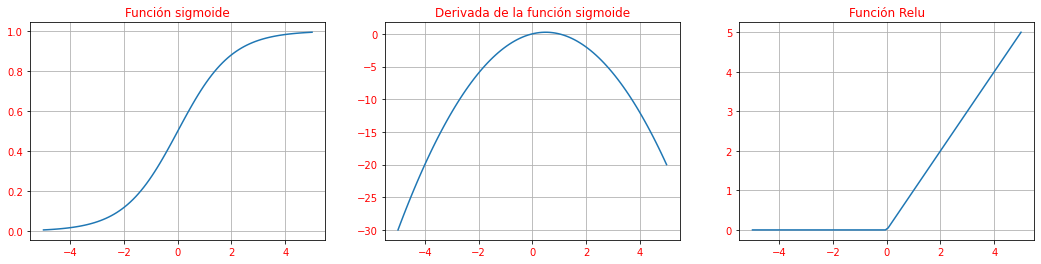

In [ ]:
# Función sigmoide 
sigm = (lambda x: 1/( 1 + np.e**(-x) ), 
        lambda x: x* (1-x))

# Función Relu 
relu = lambda x: np.maximum(0,x)

vector = np.linspace(-5, 5, 100)

plt.figure(figsize=(18, 4))
plt.subplot(131)
plt.plot(vector, sigm[0](vector))
plt.title("Función sigmoide", c='r'); plt.xticks(c='r'); plt.yticks(c='r'); plt.grid()
plt.subplot(132)
plt.plot(vector, sigm[1](vector))
plt.title("Derivada de la función sigmoide", c='r'); plt.xticks(c='r'); plt.yticks(c='r'); plt.grid()
plt.subplot(133)
plt.plot(vector, relu(vector))
plt.title("Función Relu", c='r'); plt.xticks(c='r'); plt.yticks(c='r'); plt.grid()
plt.show()


#**Estructuración de la red neuronal**

In [ ]:
l0 = neural_layer(p, 4, sigm)
l1 = neural_layer(4, 8, sigm)

def create_nn(topology, act_f):
  '''
  Esta función permita la automatización del diseño de la estructura de la red neuronal
    Parametros 
      topology: vector con el número de neuronas que tengo por cada una de las capas 
      act_f: función de activación que tengo en cada una de las capas
  '''

  # Estructura de datos que va a contener y/o soportar toda la estructura de la red neuronal
  nn = [] 

  for l, layer in enumerate(topology[:-1]):    
    nn.append(neural_layer(topology[l], topology[l+1], act_f))

  return nn


In [ ]:
# Número de neuronas por cada capa 
topology = [p, 10, 1] 
# Crear Red Neuronal
neural_net = create_nn(topology, sigm)

#**Entrenamiento de la Red Neuronal**

1. Computo del error de la última capa

$\delta^L = \frac{\partial C}{\partial a^L}.\frac{\partial C}{\partial z^L}$

2. Retropropagación del error a la capa previa 

$\delta^{L-1} = W^L \delta^L \frac{\partial a^{l-1}}{\partial Z^{l-1}}$

3. Calculo de las derivadas de la capa usando el error

$\frac{\partial C}{\partial b^{L-1}} = \delta^{L-1}$

$\frac{\partial C}{\partial W^{L-1}} = \delta^{L-1} a^{L-2}$



In [ ]:
l_cost = (lambda Yp, Yr: np.mean((Yp - Yr) ** 2),
           lambda Yp, Yr: (Yp - Yr))

lr = 0.5 

def train(neural_net, X, Y, l_cost, lr, train=True):
  '''
  Función de total que realiza todo el entrenamiento de la red
    Paremtros:
      neural_net: estructura de la red neuronal
      X: vector de caracteristicas de la red 
      y: etiquetas o valores de predicción de la red
      l_cost: función de costo a minimizar
      lr: tasa de aprendizaje del modelo 
  '''
  
  # Vector donde guardamos los pares de información (suma ponderada de cada capa, y el valor de activación) ==> (z0, a0), (z1, a1), (z2, a2)
  out = [(None, X)]
  
  # Procesamiento hacia adelante de la red neuronal  
  for l, layer in enumerate(neural_net):
    # Calculo de la suma ponderada   
    z = out[-1][1] @ neural_net[l].w + neural_net[l].b
    # Valor de extracción de la función de activación
    a = neural_net[l].act_f[0](z)
    # Concatenación de los valores
    out.append((z, a))

  # Algoritmo Backpropagation y gradiente descente
  if train:
    # Backward Pass
    deltas = []
  
    for l in reversed(range(0, len(neural_net))):
      '''
        l es el vector de capas que tiene la red neuronal
      '''  
      z = out[l+1][0]
      a = out[l+1][1]

      if l == len(neural_net) - 1:
        # Computo de l erro de la última capa (ver ecuación 1) 
        deltas.insert(0, l_cost[1](a, Y) * neural_net[l].act_f[1](a))
      else:
        # Retropropagación del error a la capa anterior (ver ecuación 2)
        deltas.insert(0, deltas[0] @ _w.T * neural_net[l].act_f[1](a))

      '''
      '''
      _w = neural_net[l].w

      # Algoritmo de gradiente descendente ... Calulo de las derivadas de la capa usando el error (ver ecuaciones 3)
      neural_net[l].b = neural_net[l].b -  np.mean(deltas[0], axis=0, keepdims=True) * lr 
      neural_net[l].w = neural_net[l].w - out[l][1].T @ deltas[0] * lr

  return out[-1][1]


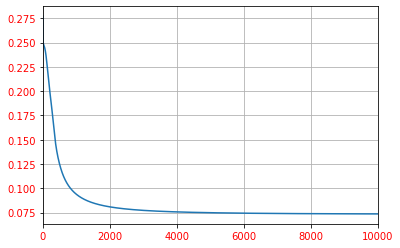

In [ ]:
neural = create_nn(topology, sigm)

loss = []
for i in range(10000):
  prediction = train(neural, X, y, l_cost, lr=0.01)
  loss.append(l_cost[0](prediction, y))

plt.plot(loss)
plt.xlim(0,len(loss))
plt.xticks(c='r')
plt.yticks(c='r')
plt.grid()
plt.show()